# **Qualidade de vinhos tintos**

Vinho tinto é um tipo de vinho feito a partir de uvas pretas ou tintas e para sua produção é necessário que haja a maceração das cascas no mosto com a finalidade de atribuir cor e sabor à bebida.

Historicamente, o vinho tem grande importância histórica e religiosa, estando presente em diversos períodos da humanidade. Cada cultura relata o surgimento da bebida de uma forma diferente. Os cristãos, por exemplo, acreditam que foi Noé quem produziu o primeiro vinho do mundo. Já os gregos consideraram o vinho como um presente dos deuses. Já do ponto de vista histórico, as evidências da produção de vinho foram encontradas em sítios arqueológicos na China (7000 a.C.), na Armênia (6100 a.C.), na Geórgia (6000 a.C.), no Levante (5000 a.C.), no Irã (5000 a.C.), na Grécia (4500 a.C.) e na Sicília (4000 a.C.). No entanto, as primeiras prensas e outros equipamentos vitivinícolas terem sido encontrados na Armênia em 4000 a.C. Ainda, os enólogos dizem que a bebida possa ter surgido por acaso, talvez por um pouco de uvas amassadas terem sido esquecidas em um recipiente e, posteriormente, sofreram a fermentação, criando o primeiro vinho.

Atualmente, o vinho é a segunda bebida alcoólica mais consumida no mundo ficando atrás apenas da cerveja. E no Brasil é a terceira bebida alcoólica mais consumida. Além disso, o maior produtor de vinho é a França seguida pela Itália.

Ainda, podemos citar alguns fatos interessantes sobre o vinho:
- Os benefícios para saúde dos vinhos tintos vêm dos taninos;
- Vinhos tintos novos são melhores do que os envelhecidos, se levar em conta o aspecto saúde, por terem maiores níveis de taninos;
- Para ter a mesma quantidade de antioxidantes encontrados de uma garrafa de vinho, você teria que beber 20 copos de suco de maçã ou 7 copos de suco de laranja;
- Apenas 5% de todo o vinho produzido vai realmente melhorar com o envelhecimento e os outros 95% devem ser bebidos até 1 ano após chegarem ao mercado;
- Vinhos europeus, normalmente, são nomeados de acordo com a região em que são fabricados, vinhos não europeus, normalmente, são nomeados de acordo com as diferentes variedades de uvas.

## **Obtenção dos dados**

O conjunto de dados foi obtido no site [Kaggle](https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009) e é descrito da seguinte forma:
> O conjunto de dados está relacionado a variante tinto do vinho Português "Vinho Verde" (Para mais detalhes: [clique aqui](https://www.vinhoverde.pt/) - além disso consulte a referência Cortez et al. (2009)).
>
> Devido a questões de privacidade e logística, apenas variáveis físico-químicas (variáveis independentes) e sensoriais (variável classe) estão disponíveis (por exemplo, não há dados sobre tipo de uva, wine brand, preço de venda do vinho, etc.)
>
> Aindao, a variável classe está ordenada e desbalanceada (há muito mais vinhos normais do que excelentes ou ruins).

## **Dicionário de variáveis**

**Variável**|**Descrição**
------------|-------------
`fixed acidity`|Acidez fixa - diferença entre a acidez total e a acidez volátil.
`volatile acidity`| Acidez volátil - ácido acético que é formado na fermentação alcoólica e, em dose elevada, origina o aroma a vinagre.
`citric acid`|Ácido cítrico - é um ácido orgânico forte, normalmente presente em fracas quantidades nos mostos de uva e geralmente ausente nos vinhos.
`residual sugar`|Açúcar residual - açúcar que sobra após terminar a fermentação alcoólica.
`chlorides`|Cloretos - indica a presença de sal no vinho.
`free sulfur dioxide`|Dióxido de enxofre livre - é uma medida da quantidade de dióxido de enxofre que não está ligado a outras moléculas.
`total sulfur dioxide`|Dióxido de enxofre total - é uma médida de ambos os dióxidos de enxofre, livre e ligado a outras moléculas.
`density`|Densidade.
`pH`|pH.
`sulphates`|Sulfatos - indica a presença de sais de ácido sulfúrico.
`alcohol`|Álcool.
`quality`| Qualidade - indica a qualidade do vinho de 0 a 10, sendo 0 a pior nota e 10 a melhor.

## **Importando os pacotes necessários e os dados**

In [79]:
# Importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Importando as bibliotecas para a construção dos modelos de Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

from imblearn.under_sampling import RandomUnderSampler

from yellowbrick.classifier import ROCAUC

# Configurando o notebook
%matplotlib inline
sns.set(style='white')

# Carregando os dados
df = pd.read_csv("./Dataset/winequality-red.csv", sep=";")

C:\Users\Dino\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


**Primeiras entradas e dimensões do conjunto de dados**

In [2]:
# Dimensões do dataset
print("Dimensões do conjunto de dados:\n{} linhas e {} colunas\n".format(df.shape[0], df.shape[1]))

# Primeiras entradas do dataset
print("Primeiras entradas:")
df.head()

Dimensões do conjunto de dados:
1599 linhas e 12 colunas

Primeiras entradas:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## **Análise Exploratória dos Dados**

Nesta seção, vou verificar a integridade e a usabilidade do conjunto de dados, verificando diferentes características do conjunto. 
Para isso, irei mostrar o nome dos atributos, se há valores ausentes e o tipo de cada coluna. **TERMINAR DEPOIS QUE COMEÇAR A ANÁLISE**

In [3]:
print("Nome dos atributos:\n{}".format(df.columns.values))
print("\nQuantidade de valores ausentes por atributo:\n{}".format(df.isnull().sum()))
print("\nTipo de cada atributo:\n{}".format(df.dtypes))

Nome dos atributos:
['fixed acidity' 'volatile acidity' 'citric acid' 'residual sugar'
 'chlorides' 'free sulfur dioxide' 'total sulfur dioxide' 'density' 'pH'
 'sulphates' 'alcohol' 'quality']

Quantidade de valores ausentes por atributo:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Tipo de cada atributo:
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


Percebemos que não há valores ausentes no conjunto de dados, com isso não será necessário fazer um tratamento nesse sentido. E, também, as *features* (variáveis independentes) são do tipo `float64`e a variável classe (`quality`) é do tipo `int64`, ou seja, já estão corretas e também não será preciso tratá-las.

### **Resumo estatístico**

In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Pelo resumo estatístico, podemos ver que a variável `quality` varia de 3 a 8, mesmo ela podendo variar de 0 a 10, ou seja, nenhum vinho foi tão ruim a ponto de receber 0 ou tão bom a ponto de receber 10.
Também percebemos que, possivelmente, há *outliers* nas variáveis: `volatile acidity`, `residual sugar`, `chlorides`, `free sulfur dioxide`, `total sulfur dioxide` e `sulphates`.

Com isso, vamos separar a variável `quality` em apenas duas categorias, sendo que os vinhos que receberam notas menor ou igual a 6 serão considerados ruins e serão definidos como 0, jáos que receberam nota maior que 6 serão considerados bons e serão definidos como 1.

In [5]:
# Categorizando a variável quality e criando a variável quality_cat
df['quality_cat'] = pd.cut(df['quality'], bins=(2, 6.5, 8), labels = [0, 1])

In [6]:
# Verificando quais as entradas únicas da variável quality_cat
df['quality_cat'] = df['quality_cat'].astype('int64')
df['quality_cat'].unique()

array([0, 1], dtype=int64)

### **Verificação e tratamento dos *outliers***

Nesta seção vou fazer a verificação e tratamento das variáveis `volatile acidity`, `residual sugar`, `chlorides`, `free sulfur dioxide`, `total sulfur dioxide` e `sulphates` que, possivelmente, apresentam *outliers*. Primeiro, faremos um boxplot para cada uma das variáveis:

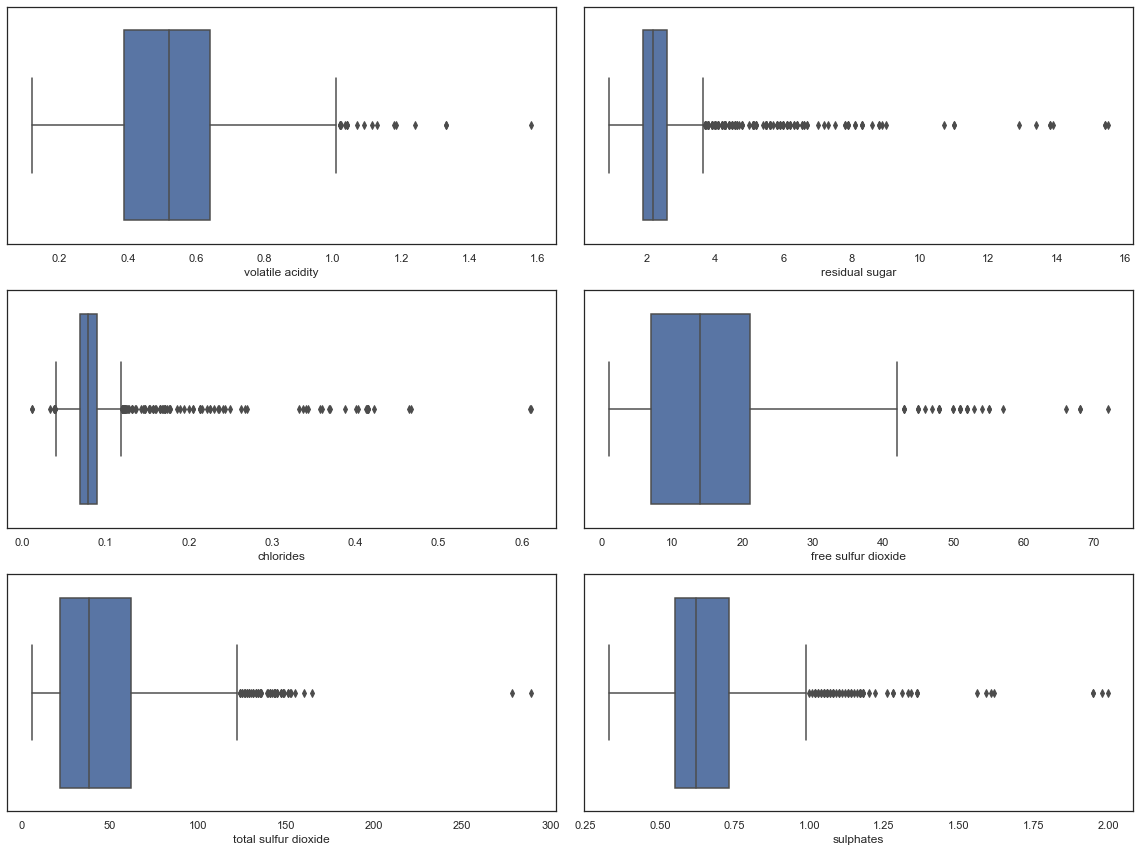

In [7]:
# Configurando o plot
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(16, 12))

sns.boxplot(df['volatile acidity'], ax=ax[0, 0])
sns.boxplot(df['residual sugar'], ax=ax[0, 1])
sns.boxplot(df['chlorides'], ax=ax[1, 0])
sns.boxplot(df['free sulfur dioxide'], ax=ax[1, 1])
sns.boxplot(df['total sulfur dioxide'], ax=ax[2, 0])
sns.boxplot(df['sulphates'], ax=ax[2, 1])

plt.tight_layout()

Como podemos perceber pelos boxplots, as variáveis com a maior quantidade de *outliers* são `residual sugar`, `chlorides` e `sulphates`. Sendo assim, vamos calcular o IQR para essas três variáveis e definir o limite de corte para eliminar os *outliers*.

In [8]:
# Identificando os outliers para a variável residual sugar
q1_rsugar = df['residual sugar'].quantile(0.25)
q3_rsugar = df['residual sugar'].quantile(0.75)
IQR_rsugar = q3_rsugar - q1_rsugar

print("IQR da variável residual sugar: {}\n".format(round(IQR_rsugar, 2)))

# Definindo os limites para a variável residual sugar
sup_rsugar = q3_rsugar + 1.5 * IQR_rsugar
inf_rsugar = q1_rsugar - 1.5 * IQR_rsugar

print("Limite superior de residual sugar: {}".format(round(sup_rsugar, 2)))
print("Limite inferior de residual sugar: {}".format(round(inf_rsugar, 2)))

IQR da variável residual sugar: 0.7

Limite superior de residual sugar: 3.65
Limite inferior de residual sugar: 0.85


In [9]:
cut_rsugar = len(df[df['residual sugar'] < 0.85]) + len(df[df['residual sugar'] > 3.65])

print("As entradas da variável residual sugar fora dos limites representam {} % do dataset.\n".format(round((cut_rsugar / df.shape[0]) * 100, 2)))

As entradas da variável residual sugar fora dos limites representam 9.69 % do dataset.



In [10]:
# Identificando os outliers para a variável chlorides
q1_chlo = df['chlorides'].quantile(0.25)
q3_chlo = df['chlorides'].quantile(0.75)
IQR_chlo = q3_chlo - q1_chlo

print("IQR da variável chlorides: {}\n".format(round(IQR_chlo, 2)))

# Definindo os limites para a variável chlorides
sup_chlo = q3_chlo + 1.5 * IQR_chlo
inf_chlo = q1_chlo - 1.5 * IQR_chlo

print("Limite superior de chlorides: {}".format(round(sup_chlo, 2)))
print("Limite inferior de chlorides: {}".format(round(inf_chlo, 2)))

IQR da variável chlorides: 0.02

Limite superior de chlorides: 0.12
Limite inferior de chlorides: 0.04


In [11]:
cut_chlo = len(df[df['chlorides'] < 0.04]) + len(df[df['chlorides'] > 0.12])

print("As entradas da variável chlorides fora dos limites representam {} % do dataset.\n".format(round((cut_chlo / df.shape[0]) * 100, 2)))

As entradas da variável chlorides fora dos limites representam 6.82 % do dataset.



In [12]:
# Identificando os outliers para a variável sulphates
q1_sulp = df['sulphates'].quantile(0.25)
q3_sulp = df['sulphates'].quantile(0.75)
IQR_sulp = q3_sulp - q1_sulp

print("IQR da variável sulphates: {}\n".format(round(IQR_sulp, 2)))

# Definindo os limites para a variável sulphates
sup_sulp = q3_sulp + 1.5 * IQR_sulp
inf_sulp = q1_sulp - 1.5 * IQR_sulp

print("Limite superior de sulphates: {}".format(round(sup_sulp, 2)))
print("Limite inferior de sulphates: {}".format(round(inf_sulp, 2)))

IQR da variável sulphates: 0.18

Limite superior de sulphates: 1.0
Limite inferior de sulphates: 0.28


In [13]:
cut_sulp = len(df[df['sulphates'] < 0.28]) + len(df[df['sulphates'] > 1.0])

print("As entradas da variável sulphates fora dos limites representam {} % do dataset.\n".format(round((cut_sulp / df.shape[0]) * 100, 2)))

As entradas da variável sulphates fora dos limites representam 3.63 % do dataset.



Com isso, vamos remover as entradas que estão fora dos limites de corte das variáveis `residual sugar`, `chlorides` e `sulphates`:

In [14]:
df_clean = df.copy()

df_clean.drop(df_clean[df_clean['residual sugar'] > 3.65].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean['residual sugar'] < 0.85].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean['chlorides'] > 0.12].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean['chlorides'] < 0.04].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean['sulphates'] > 1.0].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean['sulphates'] < 0.28].index, axis=0, inplace=True)

Plotando novamente o boxplot para as variáveis:

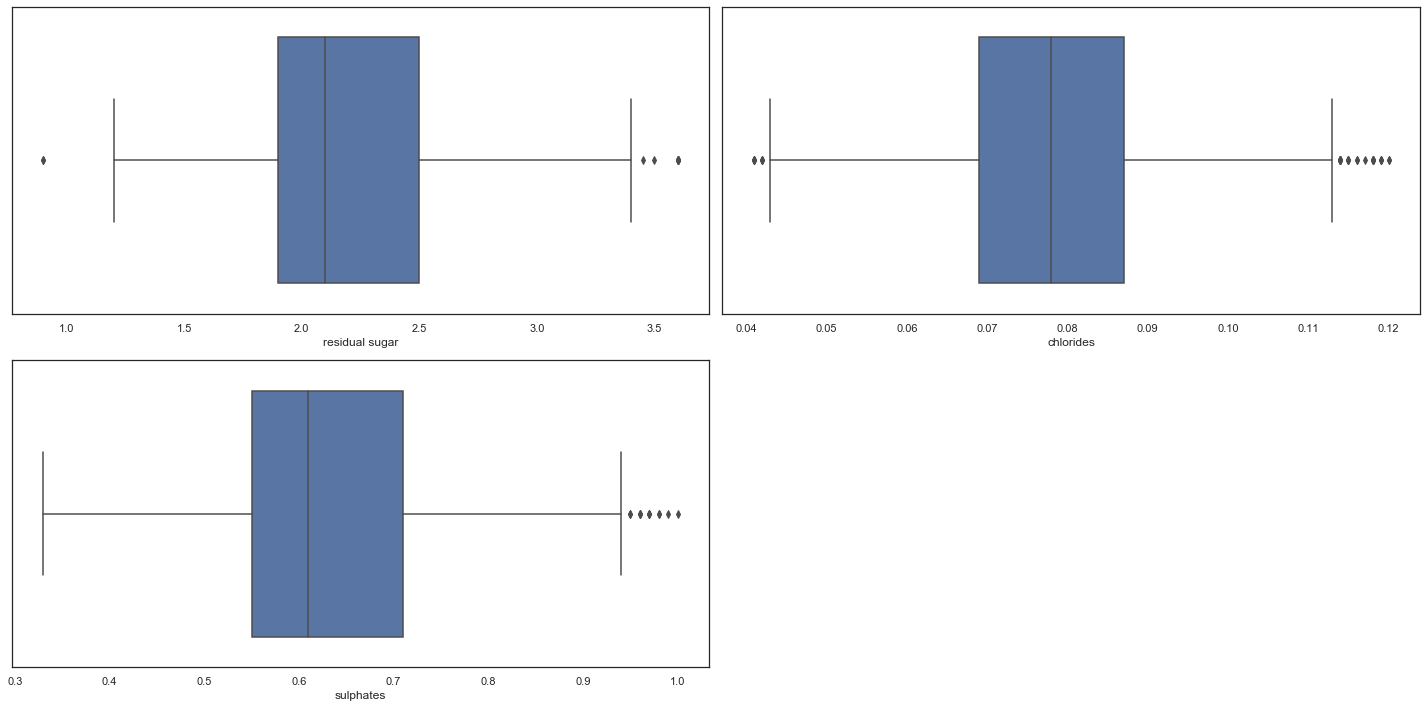

In [15]:
# Configurando o plot
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
fig.delaxes(ax[1,1])

sns.boxplot(df_clean['residual sugar'], ax=ax[0, 0])
sns.boxplot(df_clean['chlorides'], ax=ax[0, 1])
sns.boxplot(df_clean['sulphates'], ax=ax[1, 0])

plt.tight_layout()

Os boxplots mostram alguns *outliers*, no entanto, esses estão sendo calculados em relação ao novo dataset e a limpeza levou em conta os dados originais.

### **Verificação do balanceamento dos dados**

Como é citado na descrição do conjunto de dados, a variável classe (`quality`) está desbalanceada. Utilizando um gráfico, fica mais fácil percebemos este desbalanceamento.

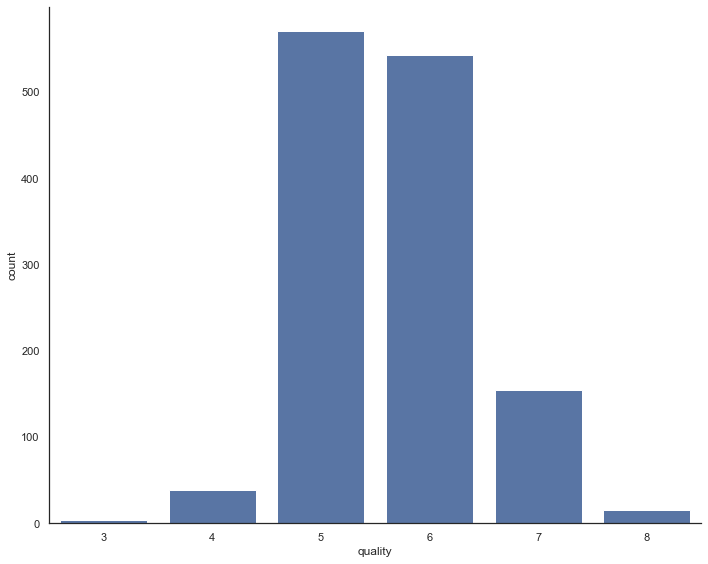

In [16]:
# Construindo o gráfico
fig, ax = plt.subplots(figsize=(10,8))

sns.countplot(df_clean['quality'], color='b', ax=ax)
sns.despine()

plt.tight_layout()

Pelo gráfico, fica fácil perceber que a maioria dos notas ficou em 5 ou 6.

Vamos analisar o balanceamento para a variável `quality_cat`

In [17]:
# Porcentagem de cada classe
print("A classe 0 representa {} % de todas as entradas.".format(round((len(df_clean[df_clean['quality_cat'] == 0]) / df_clean.shape[0]) * 100, 2)))
print("A classe 1 representa {} % de todas as entradas.".format(round((len(df_clean[df_clean['quality_cat'] == 1]) / df_clean.shape[0]) * 100, 2)))

A classe 0 representa 87.25 % de todas as entradas.
A classe 1 representa 12.75 % de todas as entradas.


Pela porcentagem de cada classe, percebemos que a classe 1 representa apenas 12,75% do total, isso já é um desbalanceamento considerável. Para uma melhor visualização do desbalanceamento farei um gráfico de barras da variável `quality_cat`.

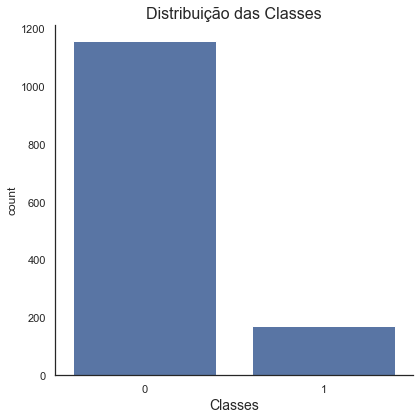

In [18]:
# Cronstruindo o gráfico de barras
fig, ax = plt.subplots(figsize=(6,6))

sns.countplot(df_clean['quality_cat'], color='b', ax=ax)
sns.despine()

ax.set_title("Distribuição das Classes", fontsize=16)
ax.set_xlabel("Classes", fontsize=14)

plt.tight_layout()

Pela Distribuição de Classes, percebemos claramente o desbalanceamento, tendo muito mais entradas da classe 0 do que da classe 1.

### **Preparação dos dados**

**Separação dos dados em treino e teste**

Uma etapa de grande importância para a construção de modelos de *Machine Learning* é separação do conjunto de dados em treino e teste, pois se não fizermos isso é, bem provável, que ocorra [*overfitting* (sobreajuste)](https://pt.wikipedia.org/wiki/Sobreajuste).

In [63]:
# Separando os dados entre feature matrix e target vector
X = df_clean.drop(['quality', 'quality_cat'], axis=1)
y = df_clean['quality_cat'] # Pois usaremos apenas a separação entre "ruim" ou "bom" (0 ou 1)

# Dividindo os dados entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

**Balanceamento dos dados**

Para realizar o balanceamento dos dados, existem vários métodos complexos tais como *Recognition-based Learning* e *Cost-sensitive Learning* e métodos mais simples que vem sendo amplamente utilizados com ótimos resultados como *Over-sampling* e *Under-sampling*.

Neste projeto, utilizaremos o método *Under-sampling* que foca na classe majoritário para balancear o conjunto de dados, ou seja, elimina aleatoriamente entradas da classe com maior quantidade de ocorrências.

Assim:

1    127
0    127
Name: quality_cat, dtype: int64 



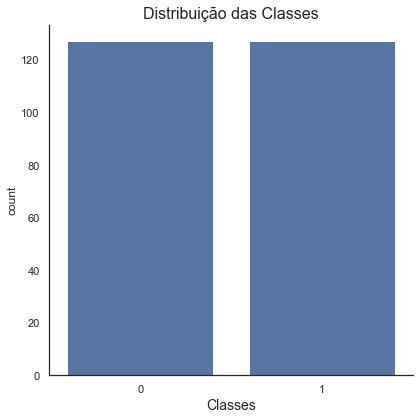

In [64]:
# Definindo o modelo para balancear
und = RandomUnderSampler()

X_und, y_und = und.fit_sample(X_train, y_train)

# Verificando o balanceamento dos dados
print(pd.Series(y_und).value_counts(), "\n")

# Plotando a nova Distribuição de Classes
fig, ax = plt.subplots(figsize=(6,6))

sns.countplot(pd.Series(y_und), color='b', ax=ax)

sns.despine()

ax.set_title("Distribuição das Classes", fontsize=16)
ax.set_xlabel("Classes", fontsize=14)

plt.tight_layout()

Após o balanceamento, percebemos as classes agora representam 50% cada uma do conjunto de dados, ou seja, não há mais a diferença como havia anteriormente.

**Correlação entre os atributos**

Farei um mapa de calor (*heatmap*) para verificar a relação entre as variáveis utilizando o método de Pearson, essa correlação será feita com os dados antes e depois do balanceamento.

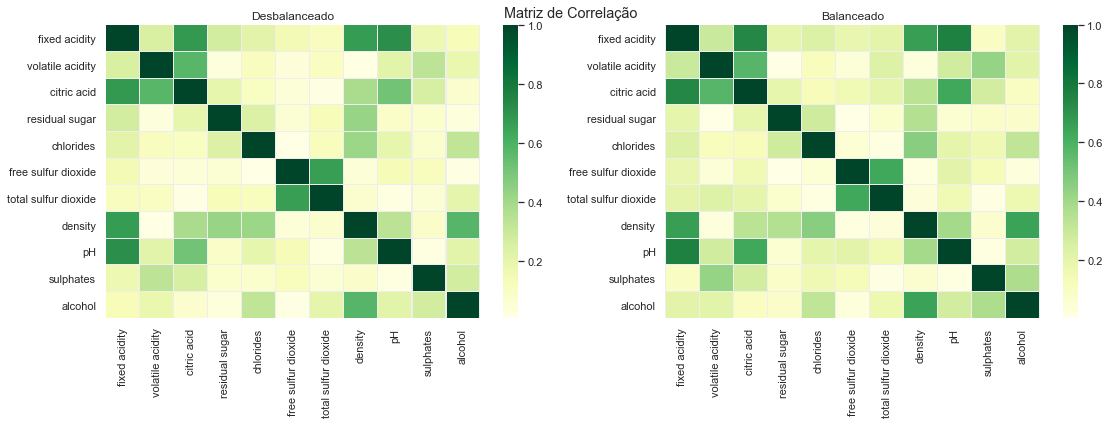

In [65]:
# Construindo o heatmap
fig, ax = plt.subplots(figsize=(16, 6), nrows=1, ncols=2)
fig.suptitle("Matriz de Correlação")

sns.heatmap(X_train.corr().abs(), cmap='YlGn', linecolor='#eeeeee', linewidths=0.1, ax=ax[0])
ax[0].set_title("Desbalanceado")

sns.heatmap(X_und.corr().abs(), cmap='YlGn', linecolor='#eeeeee', linewidths=0.1, ax=ax[1])
ax[1].set_title("Balanceado")

plt.tight_layout()

Como podemos perceber pela Matriz de Correlação, a correlação entre asvariáveis parece não ter sofrido grandes alterações após o balanceamento.

### **Modelos de *Machine Learning***

Após a preparação dos dados, vamos construir três modelos de *Machine Learning* e comparar o desempenho de cada uma deles. Os modelos utilizados serão:
- [*Random Forest* (Floresta Aleatória)](https://en.wikipedia.org/wiki/Random_forest);
- [XGBoost](https://pt.wikipedia.org/wiki/Xgboost);
- [Regressão Logística](https://pt.wikipedia.org/wiki/Regress%C3%A3o_log%C3%ADstica).

***Random Forest***

O *Random Forest* é um modelo baseado em árvores de decisão e para esses tipos de modelos não é necessário fazer uma padronização dos dados, sendo assim, vamos utilizar o modelo diretamente nos dados balanceados.

In [72]:
# Modelo Random Forest
rf_model = RandomForestClassifier()

# Definindo o melhor parâmetro
parameters = {'n_estimators': range(25, 1000, 25)}

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

rf_clf = GridSearchCV(rf_model, parameters, cv=kfold)
rf_clf.fit(X_und, y_und)

# Visualizar o melhor parâmetro
print(rf_clf.best_params_)

{'n_estimators': 75}


Agora, para o número de estimadores igual a 75, vamos analisar o desempenho do modelo.

In [73]:
# Definindo o modelo com n_estimators igual a 75
rf_model = RandomForestClassifier(n_estimators = 75)

# Fit do modelo
rf_model.fit(X_und, y_und)

# Testando o modelo
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)

In [74]:
# Relatório de classificação
print("Relatório de classificação para o Random Forest:\n", classification_report(y_test, y_pred_rf, digits=4))

# Área sob a curva
print("Área sob a curva (AUC):\t{}%".format(round(roc_auc_score(y_test, y_pred_rf) * 100, 2)))

Relatório de classificação para o Random Forest:
               precision    recall  f1-score   support

           0     0.9667    0.8000    0.8755       290
           1     0.3696    0.8095    0.5075        42

    accuracy                         0.8012       332
   macro avg     0.6681    0.8048    0.6915       332
weighted avg     0.8911    0.8012    0.8289       332

Área sob a curva (AUC):	80.48%


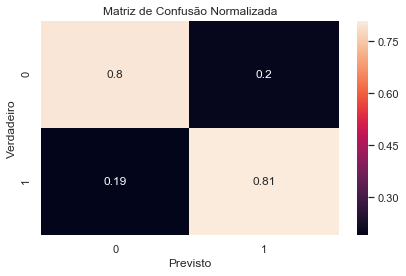

In [78]:
# Matriz de confusão
fig, ax = plt.subplots()

sns.heatmap(confusion_matrix(y_test, y_pred_rf, normalize='true'), annot=True, ax=ax)

ax.set_title('Matriz de Confusão Normalizada')
ax.set_ylabel('Verdadeiro')
ax.set_xlabel('Previsto')

plt.tight_layout()

Como para conjunto de dados desbalanceados, a acurácia não é um bom indicador de desempenho. Então, utilizei a Área sob a curva ([AUC ROC](https://medium.com/@eam.avelar/o-que-%C3%A9-auc-e-roc-nos-modelos-de-machine-learning-2e2c4112033d)) que é uma indicador interessante e apresentou um valor de 80,48%.

Ainda, na Matriz de Confusão Normalizada pode ser visualizada a taxa de acertos.

Além disso, vou plotar a curva ROC:

C:\Users\Dino\Anaconda3\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


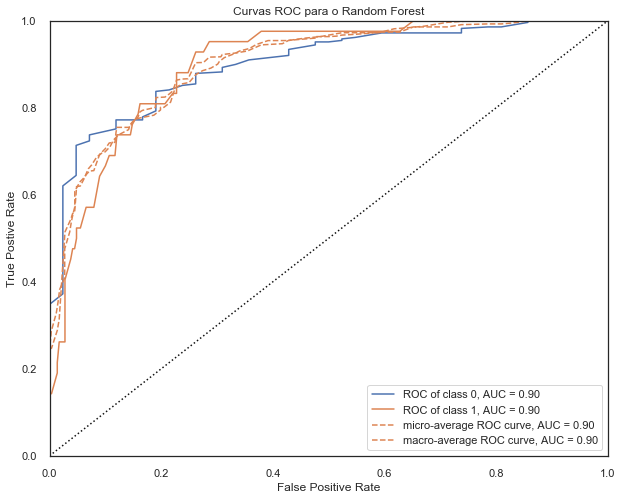

In [80]:
# Plotando a curva ROC:
fig, ax = plt.subplots(figsize=(10,8))
vis_rf = ROCAUC(rf_model, classes=[0, 1], title="Curvas ROC para o Random Forest")

vis_rf.fit(X_und, y_und); # Ajusta os dados de treino ao visualizador
vis_rf.score(X_test, y_test); # Avalia o modelo com os dados de teste
vis_rf.show(); # Finaliza e mostra a figura